# Probability Distributions

## Discrete Probability Distributions

### Bernoulli Distribution

### Binomial Distribution

The repetition of multiple independent Bernoulli trials is called a Bernoulli process. The
outcomes of a Bernoulli process will follow a Binomial distribution. As such, the Bernoulli
distribution would be a Binomial distribution with a single trial.

In [ ]:
from numpy.random import binomial
from scipy.stats import binom

In [ ]:
p = 0.3
n = 100

In [ ]:
success = binomial(n, p)
print(f'Total Success is: {success}')

In [ ]:
mean, var,_,_ = binom.stats(n, p, moments='mvsk')
print(f'Mean={mean}, Variance={var}')

In [ ]:
dist = binom(n, p)

In [ ]:
for n in range(10, 110, 10):
    print(f'Probability of {n} success is: {dist.pmf(n)*100 :0.3f}%')

In [ ]:
for n in range(10, 110, 10):
    print(f'Probbaility of less than {n} success is: {dist.cdf(n)*100:0.3f}%')

### Multinoulli Distribution

The Multinoulli distribution, also called the categorical distribution, covers the case where an
event will have one of K possible outcomes.

In [ ]:
from numpy.random import multinomial

In [ ]:
p = [1.0/3.0, 1.0/3.0, 1.0/3.0]
k = 100

In [ ]:
dist = multinomial(k, p)

In [ ]:
dist

In [ ]:
for i in range(len(dist)):
    print(f'Case {i+1}: {dist[i]}')

In [ ]:
#prob = dist.pmf([33, 33, 34])

## Continuous Probability Distributions

### Normal Distribution

In [ ]:
from numpy.random import normal
from scipy.stats import norm
from matplotlib import pyplot

In [ ]:
mu = 50
sigma = 5

In [ ]:
samples = normal(mu, sigma, size=10)
print(samples)

In [ ]:
dist = norm(mu, sigma)

In [ ]:
values = [value for value in range(30, 70)]

In [ ]:
probabilities = [dist.pdf(value) for value in values]
pyplot.plot(values, probabilities)
pyplot.show()

In [ ]:
cprobs = [dist.cdf(value) for value in values]
pyplot.plot(values, cprobs)
pyplot.show()

In [ ]:
low_end = dist.ppf(0.025)
high_end = dist.ppf(0.975)
print(f'Middle 95% between {low_end: 0.1f} and {high_end: 0.1f}')

### Exponential Distribution

In [ ]:
from numpy.random import exponential
from scipy.stats import expon
from matplotlib import pyplot

In [ ]:
beta = 50
n = 10

In [ ]:
samples = exponential(beta, n)
print(samples)

In [ ]:
dist = expon(beta)

In [ ]:
values = [value for value in range(50, 70)]

In [ ]:
probabilities = [dist.pdf(value) for value in values]
pyplot.plot(values, probabilities)
pyplot.show()

In [ ]:
cprobs = [dist.cdf(value) for value in values]
pyplot.plot(values, cprobs)
pyplot.show()

### Pareto Distribution

In [ ]:
from numpy.random import pareto

In [ ]:
alpha = 1.1
n = 10 

In [ ]:
samples = pareto(alpha, n)
print(samples)

In [ ]:
from scipy.stats import pareto
dist = pareto(alpha)

In [ ]:
values  = [value/10.0 for value in range(10, 100)]
probabilities = [dist.pdf(value) for value in values]

In [ ]:
pyplot.plot(values, probabilities)
pyplot.show()

In [ ]:
cprobs = [dist.cdf(value) for value in values]
pyplot.plot(values, cprobs)
pyplot.show()

## Probability Density Estimation

### Summarize Density With a Histogram

In [ ]:
from numpy.random import normal
from matplotlib import pyplot

In [ ]:
samples = normal(size=100)

In [ ]:
pyplot.hist(samples, bins=10)
pyplot.show()

### Parametric Density Estimation

In [ ]:
from matplotlib import pyplot
from numpy import mean, std
from numpy.random import normal
from scipy.stats import norm

In [ ]:
samples = normal(loc=50, scale=5, size=1000)
sample_mean = mean(samples)
sample_std = std(samples)

In [ ]:
print(f'Mean= {sample_mean:0.3f}, Standard Deviation= {sample_std:.3f}')

Mean= 50.358, Standard Deviation= 5.188


In [ ]:
dist = norm(sample_mean, sample_std)

In [ ]:
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]

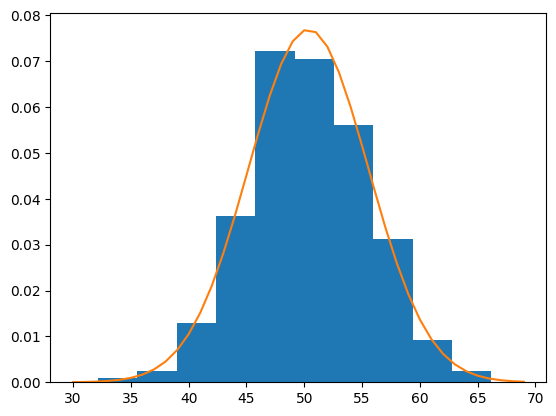

In [ ]:
pyplot.hist(samples, bins=10, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

### Nonparametric Density Estimation

In [ ]:
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack, asarray, exp
from sklearn.neighbors import KernelDensity

In [ ]:
samples1 = normal(loc=20, scale=5, size=300)
samples2 = normal(loc=40, scale=5, size=700)
samples = hstack((samples1, samples2))
samples.shape

(1000,)

In [ ]:
samples = samples.reshape(len(samples), 1)
samples.shape

(1000, 1)

In [ ]:
model = KernelDensity(bandwidth=2, kernel='gaussian')

In [ ]:
model.fit(samples)

KernelDensity(bandwidth=2)

In [ ]:
values = asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))

In [ ]:
probabilities = model.score_samples(values)
probabilities = exp(probabilities)

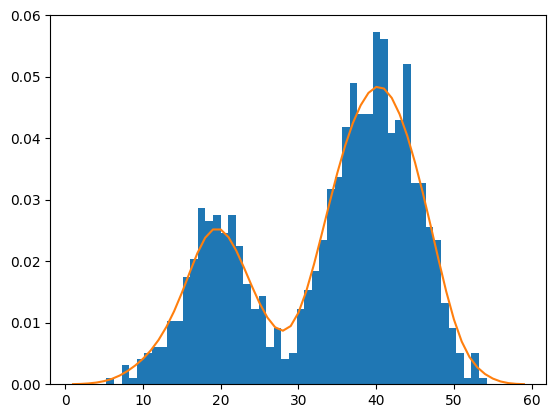

In [ ]:
pyplot.hist(samples, bins=50, density=True)
pyplot.plot(values[:], probabilities)
pyplot.show()